# 1 .데이터 불러오기

In [97]:
import pandas as pd
df = pd.read_csv('./datas/train_df.csv', index_col=0)
test = pd.read_csv('./datas/test_df.csv', index_col=0)

In [30]:
df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0,3,1,1,1,3,2,0,1
1,1,1,2,2,2,4,2,0,1
2,1,3,2,1,3,3,1,1,1
3,1,1,2,1,2,4,2,0,1
4,0,3,1,1,1,4,1,1,1


In [89]:
test.head()

,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,3,1,3,1,4,1,1,1
1,3,2,1,2,5,2,0,1
2,2,1,3,1,7,1,1,1
3,3,1,1,1,3,1,1,1
4,3,2,1,2,3,3,0,1


In [31]:
# 학습 세부 정보 X
X = df.iloc[:,1:]

# 학습 생존 여부 y
y = df.iloc[:,0]


# 2. 학습 및 테스트 셋 준비

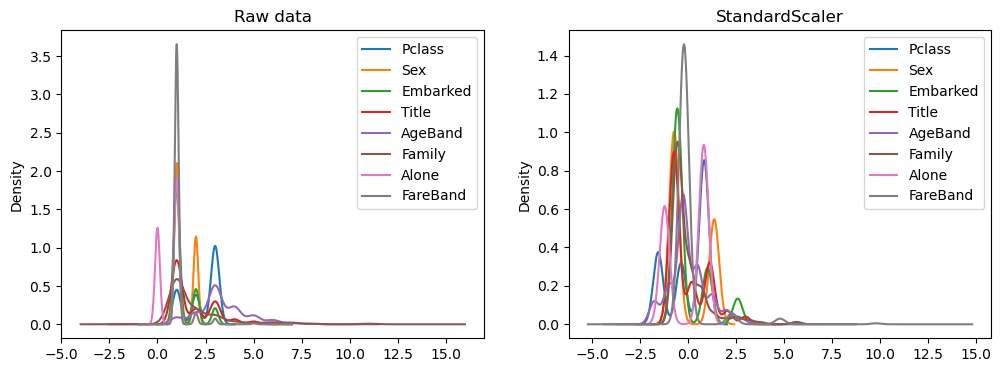

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

fig, ax = plt.subplots(1, 2, figsize=(12,4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [98]:
# train_test_split으로 나눴을 때
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(668, 8) (668,)
(223, 8) (223,)


In [100]:
# 실제 test.csv 파일로 shape 확인
print(X.shape)
print(test.shape)

(891, 8)
(418, 8)


## 3-1. 로지스틱 회귀

In [34]:
from sklearn.linear_model import LogisticRegression # 임포트
classifier = LogisticRegression() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.99 %
Standard Deviation: 3.21 %


In [35]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(classifier.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.065021
3,Title,0.476638
2,Embarked,0.146942
7,FareBand,0.109188
4,AgeBand,-0.239855
5,Family,-0.435765
6,Alone,-0.770335
0,Pclass,-0.903679


- 로지스틱 회귀(분류)에서 생존율에 영향을 끼치는 가장 큰 요인은 성별임

## 3-2. 결정 트리 분류

In [36]:
from sklearn.tree import DecisionTreeClassifier # 임포트
classifier = DecisionTreeClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 79.50 %
Standard Deviation: 6.09 %


## 3-3. 랜덤 포레스트

In [37]:
from sklearn.ensemble import RandomForestClassifier # 임포트
classifier = RandomForestClassifier(n_estimators=50) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.08 %
Standard Deviation: 4.11 %


## 3-4. 가우시안 나이브 베이즈 분류

In [132]:
from sklearn.naive_bayes import GaussianNB # 임포트
classifier = GaussianNB() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.83 %
Standard Deviation: 5.33 %


## 3-5. k-최근접 이웃

In [39]:
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

In [40]:
from sklearn.neighbors import KNeighborsClassifier # 임포트
classifier = KNeighborsClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.09 %
Standard Deviation: 4.29 %


## 3-6. 에이다 부스트

In [41]:
from sklearn.ensemble import AdaBoostClassifier # 임포트
classifier = AdaBoostClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.02 %
Standard Deviation: 5.15 %


## 3-7. 이차 판별 분석 분류

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 임포트
classifier = QuadraticDiscriminantAnalysis() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 81.14 %
Standard Deviation: 2.41 %


## 3-8. 서포트 벡터 머신

In [43]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='linear') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 80.39 %
Standard Deviation: 2.87 %


## 3-9. 서포트 벡터 머신(RBF 커널)

In [44]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='rbf') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.96 %
Standard Deviation: 4.73 %


## 3-10. 보팅 분류기

In [61]:
from sklearn.ensemble import VotingClassifier # 임포트
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 83.25 %
Standard Deviation: 5.83 %


## 3-11. 배깅 분류기

In [63]:
from sklearn.ensemble import BaggingClassifier # 임포트
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True)  # 계층별 교차 검증 설정

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산

print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도 출력
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차 출력

Accuracy: 82.94 %
Standard Deviation: 3.22 %


## ※. 알고리즘 성능 비교

Mean accuracy of LR : 81.14 %
Mean accuracy of D_tree : 79.49 %
Mean accuracy of RF : 79.50 %
Mean accuracy of GNB : 80.69 %
Mean accuracy of KNN : 80.55 %
Mean accuracy of Ada : 80.53 %
Mean accuracy of QDA : 82.64 %
Mean accuracy of SVM_l : 81.75 %
Mean accuracy of SVM_k : 81.28 %
Mean accuracy of Voting : 83.08 %
Mean accuracy of Bagging : 79.93 %


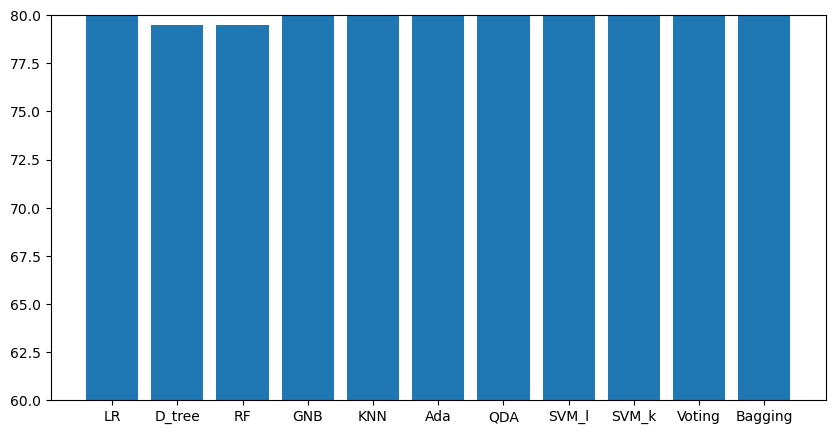

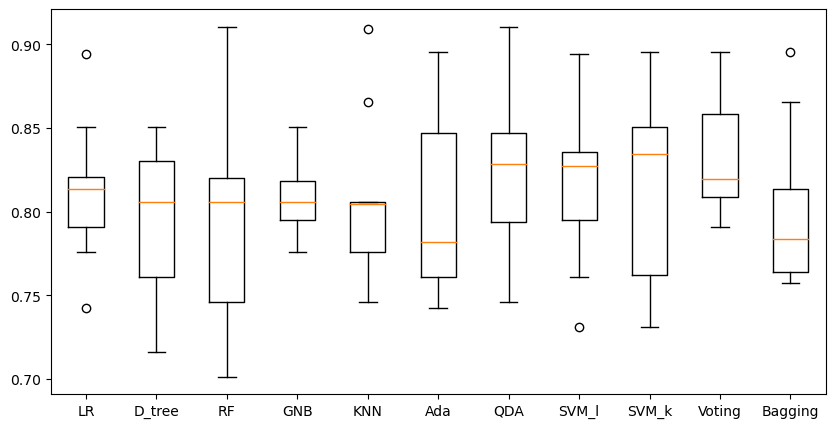

In [47]:
# 분류기 지정
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'), AdaBoostClassifier(), QuadraticDiscriminantAnalysis(), VotingClassifier(estimators=[('1', AdaBoostClassifier()), ('2', RandomForestClassifier()), ('3', SVC(kernel='linear'))]), BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)]

# 분류기 이름 지정
classifier_names = ['LR','D_tree', 'RF', 'GNB', 'KNN', 'Ada', 'QDA', 'SVM_l', 'SVM_k', 'Voting', 'Bagging']

# 리스트 생성
modelaccuracies, modelmeans, modelnames = [], [], []

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    skf = StratifiedKFold(n_splits=10, shuffle=True) # 계층별 교차 검증 설정
    accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf) # 정확도 계산
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100)) # 평균값 출력

    # 결과 저장
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 평균값 그래프 출력
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans)

# 박스 그래프 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

## 4. 테스트 세트 생존 확률 예측(GNB)

In [158]:
import numpy as np
# proba = classifier.predict_proba(X_test[:5])
proba = classifier.predict_proba(test) #test_df.csv 파일로 확인
print(np.round(proba, decimals=2))

[[0.97 0.03]
 [0.2  0.8 ]
 [0.93 0.07]
 [0.99 0.01]
 [0.22 0.78]
 [0.99 0.01]
 [0.08 0.92]
 [0.94 0.06]
 [0.3  0.7 ]
 [0.97 0.03]
 [0.99 0.01]
 [0.92 0.08]
 [0.03 0.97]
 [0.93 0.07]
 [0.03 0.97]
 [0.07 0.93]
 [0.94 0.06]
 [0.98 0.02]
 [0.07 0.93]
 [0.34 0.66]
 [0.74 0.26]
 [0.42 0.58]
 [0.09 0.91]
 [0.72 0.28]
 [0.   1.  ]
 [0.97 0.03]
 [0.01 0.99]
 [0.98 0.02]
 [0.92 0.08]
 [0.96 0.04]
 [0.93 0.07]
 [0.94 0.06]
 [0.35 0.65]
 [0.35 0.65]
 [0.74 0.26]
 [0.98 0.02]
 [0.18 0.82]
 [0.18 0.82]
 [0.99 0.01]
 [0.99 0.01]
 [0.95 0.05]
 [0.92 0.08]
 [0.99 0.01]
 [0.24 0.76]
 [0.03 0.97]
 [0.99 0.01]
 [0.89 0.11]
 [0.97 0.03]
 [0.06 0.94]
 [0.23 0.77]
 [0.79 0.21]
 [0.96 0.04]
 [0.07 0.93]
 [0.   1.  ]
 [0.96 0.04]
 [0.89 0.11]
 [0.99 0.01]
 [0.99 0.01]
 [0.96 0.04]
 [0.   1.  ]
 [0.99 0.01]
 [0.97 0.03]
 [0.99 0.01]
 [0.08 0.92]
 [0.   1.  ]
 [0.24 0.76]
 [0.07 0.93]
 [0.92 0.08]
 [0.89 0.11]
 [0.   1.  ]
 [0.08 0.92]
 [0.99 0.01]
 [0.19 0.81]
 [0.88 0.12]
 [0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]

### 테스트 데이터 결과 확인

In [150]:
print(proba.mean(axis=0))

[0.59963263 0.40036737]


- 418명 중 사망자 약 60%, 생존자 40%

### K-평균 알고리즘으로 클러스터 찾기

In [157]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(proba)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1]), array([243, 175], dtype=int64))


- 사망자 243명, 생존자 175명으로 테스트 데이터 퍼센트와 거의 일치함

### ※. 생존 여부 추가하여 CSV로 저장

In [172]:
test_copy = test.copy()

In [173]:
print(test_copy)

     Pclass  Sex  Embarked  Title  AgeBand  Family  Alone  FareBand
0         3    1         3      1        4       1      1         1
1         3    2         1      2        5       2      0         1
2         2    1         3      1        7       1      1         1
3         3    1         1      1        3       1      1         1
4         3    2         1      2        3       3      0         1
..      ...  ...       ...    ...      ...     ...    ...       ...
413       3    1         1      1        3       1      1         1
414       1    2         2      5        5       1      1         2
415       3    1         1      1        5       1      1         1
416       3    1         1      1        3       1      1         1
417       3    1         2      4        1       3      0         1

[418 rows x 8 columns]


In [176]:
print(np.round(proba[:,1])) # proba의 두번째 내용이 실제 생존여부(0: 사망, 1: 생존)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [178]:
test_copy.insert(0, 'Survived', np.round(proba[:,1])) # Survived 컬럼 추가

In [179]:
print(test_copy)

     Survived  Pclass  Sex  Embarked  Title  AgeBand  Family  Alone  FareBand
0         0.0       3    1         3      1        4       1      1         1
1         1.0       3    2         1      2        5       2      0         1
2         0.0       2    1         3      1        7       1      1         1
3         0.0       3    1         1      1        3       1      1         1
4         1.0       3    2         1      2        3       3      0         1
..        ...     ...  ...       ...    ...      ...     ...    ...       ...
413       0.0       3    1         1      1        3       1      1         1
414       1.0       1    2         2      5        5       1      1         2
415       0.0       3    1         1      1        5       1      1         1
416       0.0       3    1         1      1        3       1      1         1
417       1.0       3    1         2      4        1       3      0         1

[418 rows x 9 columns]


In [180]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Title     418 non-null    int64  
 5   AgeBand   418 non-null    int64  
 6   Family    418 non-null    int64  
 7   Alone     418 non-null    int64  
 8   FareBand  418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 32.7 KB


In [181]:
test_copy = test_copy.astype({'Survived':'int64'}) # 데이터형 통일

In [183]:
test_copy.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0,3,1,3,1,4,1,1,1
1,1,3,2,1,2,5,2,0,1
2,0,2,1,3,1,7,1,1,1
3,0,3,1,1,1,3,1,1,1
4,1,3,2,1,2,3,3,0,1


In [184]:
# csv 파일로 저장
test_copy.to_csv('./datas/test_survived.csv')